In [1]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import networkx as nx
from matplotlib import pyplot as plt




# Networks Creation
## Real world

In [3]:
G = nx.read_adjlist('../data/tuscany.adjlist')

In [4]:
N = len(G.nodes)
L = len(G.edges)
density = nx.density(G)
degrees = [d for n, d in G.degree()]
print(N,L)
print(density)

15690 6955000
0.0565078681823775


### Erdős-Rényi

In [6]:
n = len(G.nodes)
p = nx.density(G)
ER = nx.erdos_renyi_graph(n, p)
print(len(ER.nodes), len(ER.edges()))
print(nx.density(ER))

15690 6958647
0.056537499267246105


In [8]:
nx.write_adjlist(ER,"../data/ER.adjlist")

### Barabási–Albert

In [9]:
n = len(G.nodes)
m = math.floor(np.average([degrees])**0.5)
BA = nx.barabasi_albert_graph(n, m, seed=None)

In [10]:
print(BA.number_of_nodes())
print(len(BA.edges()))
print(nx.density(BA))

15690
454169
0.0036900247281843575


In [11]:
nx.write_adjlist(BA,"../data/BA.adjlist")

### Watts Strogatz

In [46]:
n = len(G.nodes)
k = math.floor(np.average(degrees))
p = np.std(degrees) / np.max(degrees)
WS = nx.watts_strogatz_graph(n, k , p, seed=None)

print(WS.number_of_nodes())
print(len(WS.edges()))
print(nx.density(WS))

15690
6950670
0.056472687870482506


In [29]:
nx.write_adjlist(WS,"../data/WS.adjlist")

## Configuration Model

In [5]:

CM = nx.configuration_model(degrees)

In [7]:
print(CM.number_of_nodes())
print(len(CM.edges()))
print(nx.density(CM))

15690
6955000
0.0565078681823775


In [6]:
nx.write_adjlist(CM,"../data/CM.adjlist")

# Networks Analysis

In [ ]:

with open(path+"info_rw.json",'r') as jf:
    RW = json.load(jf)
    
with open(path+"info_er.json",'r') as jf:
    ER = json.load(jf)
    
with open(path+"info_ba.json",'r') as jf:
    BA = json.load(jf)
    
with open(path+"info_ws.json",'r') as jf:
    WS = json.load(jf)

In [ ]:
networks = {"Real World":RW,  "Barabási–Albert": BA, "Erdős-Rényi" : ER, "Watts Strogatz":WS}


## Degree distribution analysis


In [48]:
deg_sequences ={"Real World":[(n,d) for n,d in G.degree()],"Erdős-Rényi":[(n,d) for n,d in ER.degree()],"Barabási–Albert":[(n,d) for n,d in BA.degree()],"Watts Strogatz":[(n,d) for n,d in WS.degree()]}

In [49]:
with open("../data/degrees.json",'w') as jf:
    json.dump(deg_sequences,jf)

In [ ]:
with open("../data/degrees.json",'r') as jf:
    deg_sequences = json.load(jf)

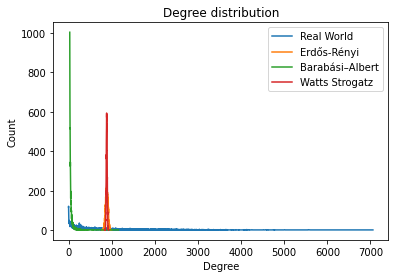

In [50]:
for name,seq in deg_sequences.items():

    degree_sequence = sorted([c for n,c in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.plot(deg, cnt)


plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend([name for name in deg_sequences.keys()])
plt.show()


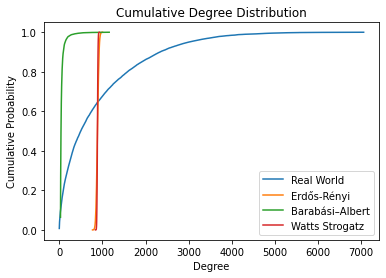

In [51]:

for name, seq in deg_sequences.items():

    degree_sequence = sorted([d for n, d in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    normalizer = sum(cnt)
    prob = [i/normalizer for i in cnt]
    cumprob = [0]
    for i, p in enumerate(prob[::-1]):
        cumprob.append(p + cumprob[-1])
    cumprob = cumprob[1:][::-1]
    plt.plot(deg, cumprob, linestyle = '-')


plt.title("Cumulative Degree Distribution")
plt.ylabel("Cumulative Probability")
plt.xlabel("Degree")
plt.legend([name for name in deg_sequences.keys()])
plt.show()

In [ ]:
for name,seq in deg_sequences.items():
    ds = sorted([d for n, d in seq], reverse=True)  
    print(name.upper())
    print('max: ',np.max(ds))
    print('min: ',np.max(ds))
    print('avg: ',np.average(ds))
    print('var: ',np.var(ds))
    print('std: ',np.std(ds))
    print('std: ',np.skew(ds))

In [ ]:
for net in [G,ER,BA,WS]:
    plot_dist(net)

In [ ]:
plt.plot(nx.degree_histogram(G))
plt.show()
print('density: ', nx.density(G))
print('average clustering coefficient: ', nx.average_clustering(G))

## Connected components analysis


In [ ]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components])
print('average componets size: ', avg_size)
print([len(c) for c in components[:7]],'etc...')

## Path analysis


## Clustering Coefficient, Density analysis


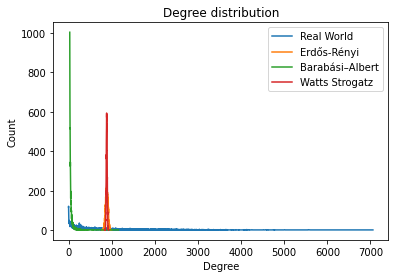

In [50]:
for name,seq in clustering_sequences.items():

    degree_sequence = sorted([c for n,c in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.plot(deg, cnt)


plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Clustering Coefficient")
plt.xscale('log')
plt.yscale('log')
plt.legend([name for name in clustering_sequences.keys()])
plt.show()


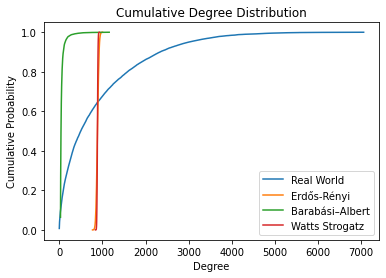

In [51]:

for name, seq in clustering_sequences.items():

    degree_sequence = sorted([d for n, d in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    normalizer = sum(cnt)
    prob = [i/normalizer for i in cnt]
    cumprob = [0]
    for i, p in enumerate(prob[::-1]):
        cumprob.append(p + cumprob[-1])
    cumprob = cumprob[1:][::-1]
    plt.plot(deg, cumprob, linestyle = '-')


plt.title("Cumulative Clustering Coefficient Distribution")
plt.ylabel("Cumulative Probability")
plt.xlabel("Degree")
plt.legend([name for name in clustering_sequences.keys()])
plt.show()

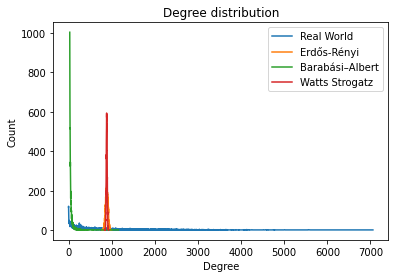

In [50]:
for name,seq in deg_sequences.items():

    degree_sequence = sorted([c for n,c in seq], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.plot(deg, cnt)


plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend([name for name in deg_sequences.keys()])
plt.show()


## Centrality analysis

In [53]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')